## Malware Classification on Behavioral Data Challenge 5 

### Read the input data files.

In [1]:
import numpy as np
import os
XTrain = np.loadtxt('training_data.csv', skiprows=1, usecols=(0,1), delimiter=',', dtype='str')
print XTrain[0]
# XTest = np.loadtxt('test_data_public_new.csv', skiprows=1, usecols=(1,), delimiter=',',dtype='str')
# print XTest[0]
YTrain = XTrain[:,-1]
XTrain = XTrain[:,0]
print XTrain.shape
YTrain = YTrain.astype(np.int)
# YTrain = YTrain.reshape(-1,1)
print type(YTrain[0]),YTrain[0],YTrain.shape
# print XTest.shape

['0' '10']
(2042,)
<type 'numpy.int64'> 10 (2042,)


In [2]:
print XTrain, YTrain

['0' '1' '2' ..., '2039' '2040' '2041'] [10 10 10 ..., 10  5 10]


In [3]:
def readInputFile(inputFile):
    with open(inputFile,'r') as f:
        fileContent = f.readlines()
        f = [i.strip('\n') for i in fileContent]
        return ' '.join(f)

In [4]:
def readFolder(folder, fileNames):
    path = folder
    folderContents = []
    for f in fileNames:
        folderContents.append(readInputFile(os.path.join(folder, f+'.txt')))
    return folderContents

In [5]:
trainSamples = readFolder(os.getcwd()+os.sep+'train', XTrain)
# print len(trainSamples), trainSamples[:2]
XTest = [str(i) for i in range(706)]
testSamples = readFolder(os.getcwd()+os.sep+'test', XTest)
# print len(testSamples), testSamples[:2]

In [6]:
# for item in trainFolder:
count = 0
indices = []
for i in xrange(len(trainSamples)):
    if trainSamples[i]=='':
        indices.append(i)
        
print len(indices)

257


In [7]:
# for i in indices:
#     print i,YTrain[i]

### Check Missing Test Cases from Challenge 3

In [8]:
predictionsC3 = os.getcwd()+os.sep+'C3_Predictions.csv'
trainC3 = os.getcwd()+os.sep+'training_data_C3.csv'
testC3 = os.getcwd()+os.sep+'test_data_public_C3.csv'
missingTest = os.getcwd()+os.sep+'test_data_missing_cuckoo.txt'
XTestMissing = np.loadtxt(missingTest, usecols=(0,1), delimiter=',', dtype='str')
XTrainC3 = np.loadtxt(trainC3, skiprows=1, usecols=(0,1,2), delimiter=',', dtype='str')
XTestC3 = np.loadtxt(testC3, skiprows=1, usecols=(0,1), delimiter=',', dtype='str')
PredictionsC3 = np.loadtxt(predictionsC3, skiprows=1, usecols=(0,1), delimiter=',', dtype='str')
print XTestMissing
print XTestC3[0], XTrainC3[0], PredictionsC3[0]

[['69' '94af7ecc940f3f2e0bec2e1e920193a9']
 ['364' 'e29f3b970b8487e06dd321c48f015493']
 ['661' '4f449201ecb529ff71a321d6d41d626e']
 ['33' '0231aebb8155fd069d17eab6a679cc1e']
 ['104' '8184fedd04e1b3642a77ac96298877c9']
 ['508' '3cdd0fb587ca6c28c891ff4c75cfe06c']
 ['521' '016b512e068383a7800166ce945bfb4e']
 ['179' 'b531346046175207d3b6f326b672d3f8']
 ['518' '8ada2473ff702a617facc11d6b1ee8ff']
 ['413' 'e15d7135b0ee671539d100600905bea6']
 ['398' 'f2a28a9059a7e9884c5f6c46ae5a98f4']
 ['396' '031b79d4410b3a924803fc46e06bd945']
 ['279' 'a1aba44b004024083d592e4310469fb1']
 ['76' '294725ae35ecfb4f5e0d29239213c2c7']
 ['130' '4fded173211150d51dd97a36ec9797c9']
 ['452' 'c95ce84ed7dbf6bf3d68b2669d10d2a2']
 ['298' 'f25de5a9c41c04e8a29b9c6617e628b0']
 ['606' '00a5b00e9702871aced2b91134c298a1']
 ['445' '0494d448cc476652b08879486bff7634']
 ['107' 'd7980d1fb080e8831301fb303a2bc5a6']
 ['29' 'c67562a02c791c793df0bccf7ffaaf98']
 ['489' '06258bf3b56c9c46c6b38c64820a11dc']
 ['316' '637d40585d5225df5b47465c13f

In [9]:
missingPredictionsFromC3 = {}
for test in XTestMissing:
#     print test, test[1], test[1] in XTrainC3[:,1], test[1] in XTestC3[:,1]
    if test[1] in XTrainC3[:,1]:
        for c3train in XTrainC3:
            if c3train[1] == test[1]:
                print c3train, test[1]
                missingPredictionsFromC3[test[1]] = c3train[2]
    elif test[1] in XTestC3[:,1]:
        for c3test in XTestC3:
            if c3test[1] == test[1]:
#                 print c3test, test[1], PredictionsC3[int(c3test[0])][-1]
                missingPredictionsFromC3[test[1]] = (int(test[0]),int(PredictionsC3[int(c3test[0])][-1]))
    else:
#         print test[1]
        missingPredictionsFromC3[test[1]] = (int(test[0]),-1)
print missingPredictionsFromC3

{'0146dc784d2b5f2b819e82468f9e388a': (531, -1), 'd7980d1fb080e8831301fb303a2bc5a6': (107, -1), '00a5b00e9702871aced2b91134c298a1': (606, 10), '031b79d4410b3a924803fc46e06bd945': (396, 2), '0494d448cc476652b08879486bff7634': (445, 3), 'b531346046175207d3b6f326b672d3f8': (179, 10), '4fded173211150d51dd97a36ec9797c9': (130, 10), '0614f6a2c6853e2c06da01a213ed8458': (126, 10), '4f449201ecb529ff71a321d6d41d626e': (661, 5), 'a1aba44b004024083d592e4310469fb1': (279, 10), '372f1c5c378cc2b6a45ec16af441c570': (109, 10), '8ada2473ff702a617facc11d6b1ee8ff': (518, -1), 'e15d7135b0ee671539d100600905bea6': (413, 10), 'e29f3b970b8487e06dd321c48f015493': (364, 1), 'c95ce84ed7dbf6bf3d68b2669d10d2a2': (452, 4), '294725ae35ecfb4f5e0d29239213c2c7': (76, 10), '0015d7459d4965b83826808d0a47d1ab': (244, 5), '08754896596057aa06ccd4eb4b393ce1': (46, 7), 'f2a28a9059a7e9884c5f6c46ae5a98f4': (398, 10), 'f25de5a9c41c04e8a29b9c6617e628b0': (298, 10), '6bdfd87e94df7763f26bcce3485fd702': (280, 10), 'c67562a02c791c793df0

In [10]:
print missingPredictionsFromC3.values()

[(531, -1), (107, -1), (606, 10), (396, 2), (445, 3), (179, 10), (130, 10), (126, 10), (661, 5), (279, 10), (109, 10), (518, -1), (413, 10), (364, 1), (452, 4), (76, 10), (244, 5), (46, 7), (398, 10), (298, 10), (280, 10), (29, 10), (316, 5), (599, 10), (521, -1), (489, -1), (33, 10), (69, 4), (508, 10), (104, -1)]


### Vowpal Wabbit

In [11]:
# import pyvw
# def cleanVWMessages(XMessages, YTrain, train=False):
#     cleanVW = []
#     Y = 0
#     for i in xrange(len(XMessages)):
#         if train:
#             Y = int(YTrain[i])
#         else:
#             Y = -1
#         if XMessages[i]:
#             cleanVW.append((Y,' | '.join(c for c in XMessages[i] if c not in ':|\n\t\r')))
#             #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
#         else:
#             cleanVW.append((Y,' '))
#             #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
#     # f.close()
#     print len(cleanVW)
#     return cleanVW
# #     print trainVW[0]

In [12]:
# print trainFolder[:2]
# trainClean = cleanVWMessages(trainFolder, YTrain, train=True)
# print trainClean[0:2]
# print testFolder[:2]
# testClean = cleanVWMessages(testFolder, YTrain, train=False)
# print testClean[0:2]

In [13]:
# def classifyVW(XTrain, XTest, YTrain, YTest, XTestSubs, XTestEmailBody, XTestSender, XTestDate, params, ruled):
#     parameters = params['parameters']
#     vw = pyvw.vw(parameters)
#     for train in XTrain:
#         ex = vw.example(str(train[0]) + " | " + train[1])
#         ex.learn()
#     YPred = []
#     for test in XTest:
#         ex1 = vw.example(" | " + test[1])
#         ex1.learn() 
#     #     print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
#         if ex1.get_simplelabel_prediction() > 0:
#             YPred.append(1)
#         else:
#             YPred.append(0)
#     if ruled:
#         rules = params['rules']

#         for r in rules:
#             if r==1:
#                 YPred = ApplyStaticRule1(XTestSubs, YPred)
#             elif r==2:
#                 YPred = ApplyStaticRule2(XTestEmailBody, YPred)
#             elif r==3:
#                 YPred = ApplyStaticRule3(XTestDate, YPred)
#             elif r==4:
#                 YPred = ApplyStaticRule4(XTestSender, YPred)
#             elif r==5:
#                 YPred = ApplyStaticRule5(XTestEmailBody, YPred)

# #     return YPred
#     YPred = np.array(YPred)
#     YTest = np.array(YTest)
#     diff = YPred - YTest
#     score = diff[diff == 0].size
#     return (100.0 * score)/(YPred.size)


In [14]:
# parameters = ''
# vw = pyvw.vw(parameters)
# for train in trainClean:
#     ex = vw.example(str(train[0]) + " | " + train[1])
#     ex.learn()
# YPred = []
# for test in testClean:
#     ex1 = vw.example(" | " + test[1])
#     ex1.learn() 
# #     print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
#     if ex1.get_simplelabel_prediction() >= 10:
#         YPred.append(10)
#     elif ex1.get_simplelabel_prediction() >= 9:
#         YPred.append(9)
#     elif ex1.get_simplelabel_prediction() >= 8:
#         YPred.append(8)
#     elif ex1.get_simplelabel_prediction() >= 7:
#         YPred.append(7)
#     elif ex1.get_simplelabel_prediction() >= 6:
#         YPred.append(6)
#     elif ex1.get_simplelabel_prediction() >= 5:
#         YPred.append(5)
#     elif ex1.get_simplelabel_prediction() >= 4:
#         YPred.append(4)
#     elif ex1.get_simplelabel_prediction() >= 3:
#         YPred.append(3)
#     elif ex1.get_simplelabel_prediction() >= 2:
#         YPred.append(2)
#     elif ex1.get_simplelabel_prediction() >= 1:
#         YPred.append(1)
#     elif ex1.get_simplelabel_prediction() >= 0:
#         YPred.append(0)

# writePredictedLabelFile(YPred)
        
# #     else:
# #         YPred.append(0)

# #     return YPred
# # YPred = np.array(YPred)
# # YTest = np.array(YTest)
# # diff = YPred - YTest
# # score = diff[diff == 0].size
# # return (100.0 * score)/(YPred.size)


### Bag of Words as Features

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
XTr = vectorizer.fit_transform(trainSamples)
print len(vectorizer.get_feature_names())
trainBagVector = XTr.toarray()
print trainBagVector.shape
XTe = vectorizer.transform(testSamples)
testBagVector = XTe.toarray()
print testBagVector.shape

5729
(2042, 5729)
(706, 5729)


### TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
# print transformer   
tfidfTrain = transformer.fit_transform(trainBagVector)
tfidfTrain = tfidfTrain.toarray()
tfidfTest = transformer.fit_transform(testBagVector)
tfidfTest = tfidfTest.toarray()
print tfidfTrain.shape, tfidfTest.shape
print tfidfTrain[0]
print tfidfTest[0]

(2042, 5729) (706, 5729)
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]


In [17]:
# f=open("trainBagVector.txt",'w')
# f.write(trainBagVector)
# np.savetxt("trainBagVector.txt",trainBagVector)

### State Transitions

In [18]:
stateDict = {}
featureVectors = vectorizer.get_feature_names()
for i in xrange(len(featureVectors)):
    stateDict[featureVectors[i]] = i+1
print len(stateDict), len(featureVectors) #, stateDict

5729 5729


In [19]:
def createStateTransitionVector(categoricalState, stateDict, maxLength):
    if categoricalState:
        feature = []
        for state in categoricalState.split(' '):
            try:
                feature.append(stateDict[state.lower()])
            except KeyError:
                pass
#                 print state
        if len(feature) != maxLength:
            for i in xrange(maxLength-len(feature)):
                feature.append(0)
        assert(len(feature)==maxLength)
        return feature
    else:
        return [0] * maxLength

In [20]:
def createStateVectors(XStates, stateDict, maxLength):
    XFeatures = []
    for state in XStates:
        XFeatures.append(createStateTransitionVector(state, stateDict, maxLength))
    return XFeatures

In [21]:
trainStateTransitionVector =  createStateVectors(trainSamples, stateDict,9353)
testStateTransitionVector = createStateVectors(testSamples, stateDict,9353)
# print trainStateTransitionVector[:2], testStateTransitionVector[:2]

In [22]:
print max([len(i) for i in trainStateTransitionVector])
print max([len(i) for i in testStateTransitionVector])

9353
9353


### N Grams as features

In [23]:
import scipy as sp
noNGram = 3
vectorizerNGram = CountVectorizer(ngram_range=(1, noNGram))
XTrainNGram = vectorizerNGram.fit_transform(trainSamples)

print vectorizerNGram


print len(vectorizerNGram.get_feature_names())
trainNGramVector = XTrainNGram.toarray()
print trainNGramVector.shape
XTestNGram = vectorizerNGram.transform(testSamples)
testNGramVector = XTestNGram.toarray()
print testNGramVector.shape


matrix_train = sp.sparse.csr_matrix(trainNGramVector)
matrix_test = sp.sparse.csr_matrix(testNGramVector)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
78310
(2042, 78310)
(706, 78310)


### Write Predicted Output Labels to File

In [24]:
def writePredictedLabelFile(YPred):
    f = open("Predictions.csv","w")
    f.write("Id,Label" + "\n")
    for i in xrange(len(YPred)):
        f.write(str(i) + "," + str(int(YPred[i]))+ "\n")
    f.close()

### Use of Challenge 3 predictions to boost our results.

In [25]:
def UseChallenge3Predictions(YPred):
    for missingTest in missingPredictionsFromC3.values():
        if missingTest[1] != -1:
#             print YPred[missingTest[0]], missingTest[1]
            YPred[missingTest[0]] = missingTest[1]
        else:
            pass
#             print YPred[missingTest[0]], missingTest[1]
    #         YPred[missingTest[0]] = 10
    writePredictedLabelFile(YPred)
    

In [26]:
# f = open("testVW.dat",'w')
# for tm in testClean:
#     f.write(' | '+tm[1] + '\r')
# f.close()
    

In [27]:
# f = open("trainVW.dat",'w')
# for tr in trainClean:
#     f.write(str(tr[0])+' | '+tr[1] + '\r')
# f.close()
# #     

### Hidden Markov Models

In [28]:
from hmmlearn.hmm import GaussianHMM

XTrainHMM = trainBagVector
XTestHMM = testBagVector

# Make an HMM instance and fitting to HMM
model = GaussianHMM(n_components=10, covariance_type="diag", n_iter=1000).fit(XTrainHMM)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(XTestHMM)

/home/vishal/anaconda2/lib/python2.7/site-packages/hmmlearn-0.2.0-py2.7-linux-x86_64.egg/hmmlearn/base.py:459: RuntimeWarning: divide by zero encountered in log
/home/vishal/anaconda2/lib/python2.7/site-packages/hmmlearn-0.2.0-py2.7-linux-x86_64.egg/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
/home/vishal/anaconda2/lib/python2.7/site-packages/hmmlearn-0.2.0-py2.7-linux-x86_64.egg/hmmlearn/base.py:468: RuntimeWarning: divide by zero encountered in log
/home/vishal/anaconda2/lib/python2.7/site-packages/hmmlearn-0.2.0-py2.7-linux-x86_64.egg/hmmlearn/base.py:469: RuntimeWarning: divide by zero encountered in log
/home/vishal/anaconda2/lib/python2.7/site-packages/hmmlearn-0.2.0-py2.7-linux-x86_64.egg/hmmlearn/base.py:624: RuntimeWarning: divide by zero encountered in log
/home/vishal/anaconda2/lib/python2.7/site-packages/hmmlearn-0.2.0-py2.7-linux-x86_64.egg/hmmlearn/base.py:451: RuntimeWarning: divide by zero encountered in log
/home/vishal/anaconda2/lib/python2

### Print trained parameters

In [74]:
print model
print("Transition matrix")
print(model.transmat_)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      n_components=10, n_iter=1000, params='stmc', random_state=None,
      startprob_prior=1.0, tol=0.01, transmat_prior=1.0, verbose=False)
Transition matrix
[[ 0.36653895  0.00127714  0.00127714  0.00127714  0.25542784  0.07279694
   0.24393359  0.01021711  0.04725415  0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          1.          0.        ]
 [ 1.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.          0.
   0.          0.          0.        ]
 [ 0.3384913   0.          0.          0.          0.28046422  0.09477756
   0.23984526  0.00386847  0.04061895  0.00193424]
 [ 0.44936709  0.          0.          0.          0.2278481   0.05063291
   0.1835443   

In [75]:
print hidden_states

state_sequence = model.decode(XTestHMM)
print state_sequence

[0 0 6 6 6 0 4 6 6 5 6 0 6 5 0 0 0 4 0 0 6 6 6 0 0 6 6 0 5 4 6 6 5 4 4 0 6
 6 5 0 6 6 0 4 6 4 4 0 6 4 0 5 6 4 6 6 0 4 6 4 5 5 6 6 0 0 4 6 6 4 0 0 6 6
 6 0 4 6 8 0 5 6 6 6 6 0 5 0 6 4 0 0 0 0 4 0 0 0 6 6 0 0 0 0 4 6 4 4 0 4 0
 0 6 0 0 4 6 0 0 4 5 6 0 0 6 6 4 0 0 0 4 4 5 4 6 0 8 6 8 0 4 4 5 0 4 4 5 6
 5 5 6 0 4 6 5 4 4 4 4 5 0 6 6 0 4 0 5 0 0 0 0 5 0 6 0 4 4 4 0 4 5 4 0 0 0
 0 0 0 0 0 0 0 0 0 0 6 0 6 0 0 0 7 0 0 6 0 5 5 0 0 6 4 0 6 0 5 5 0 5 6 6 0
 6 0 6 0 4 6 4 0 4 0 5 0 0 5 6 6 5 5 5 0 4 4 4 4 5 5 4 4 4 0 0 0 4 5 5 4 5
 0 8 5 5 4 6 0 5 5 4 4 0 0 5 0 6 4 6 5 0 4 4 5 4 0 0 4 6 5 4 4 0 5 0 0 5 0
 6 0 4 5 4 5 4 5 6 4 4 0 0 0 5 6 0 8 4 4 4 0 0 6 0 5 0 0 4 6 0 5 5 4 5 4 5
 6 5 5 6 4 6 6 0 6 6 5 6 0 4 4 6 0 0 0 5 4 0 5 4 4 0 0 5 4 5 4 4 0 5 5 4 5
 5 5 4 6 4 5 0 4 0 6 4 5 5 6 5 5 0 8 0 0 4 0 0 4 4 5 4 5 4 6 4 4 0 5 0 5 6
 4 5 4 6 0 6 4 5 6 4 0 4 4 4 4 5 0 6 4 5 4 6 0 0 4 4 4 0 6 5 4 4 0 0 5 5 4
 4 4 5 5 4 4 4 4 4 5 5 8 0 5 5 0 0 4 6 5 0 4 4 5 4 5 4 4 6 5 5 8 0 4 5 5 4
 0 0 8 5 4 4 0 4 4 5 4 0 

### NLTK HMM

In [76]:
# import nltk
# import random

# s = """"Your humble writer knows a little bit about a lot of things, but despite writing a fair amount about text processing (a book, for example), linguistic processing is a relatively novel area for me. Forgive me if I stumble through my explanations of the quite remarkable Natural Language Toolkit (NLTK), a wonderful tool for teaching, and working in, computational linguistics using Python. Computational linguistics, moreover, is closely related to the fields of artificial intelligence, language/speech recognition, translation, and grammar checking.\nWhat NLTK includes\nIt is natural to think of NLTK as a stacked series of layers that build on each other. Readers familiar with lexing and parsing of artificial languages (like, say, Python) will not have too much of a leap to understand the similar -- but deeper -- layers involved in natural language modeling.\nGlossary of terms\nCorpora: Collections of related texts. For example, the works of Shakespeare might, collectively, by called a corpus; the works of several authors, corpora.\nHistogram: The statistic distribution of the frequency of different words, letters, or other items within a data set.\nSyntagmatic: The study of syntagma; namely, the statistical relations in the contiguous occurrence of letters, words, or phrases in corpora.\nContext-free grammar: Type-2 in Noam Chomsky's hierarchy of the four types of formal grammars. See Resources for a thorough description.\nWhile NLTK comes with a number of corpora that have been pre-processed (often manually) to various degrees, conceptually each layer relies on the processing in the adjacent lower layer. Tokenization comes first; then words are tagged; then groups of words are parsed into grammatical elements, like noun phrases or sentences (according to one of several techniques, each with advantages and drawbacks); and finally sentences or other grammatical units can be classified. Along the way, NLTK gives you the ability to generate statistics about occurrences of various elements, and draw graphs that represent either the processing itself, or statistical aggregates in results.\nIn this article, you'll see some relatively fleshed-out examples from the lower-level capabilities, but most of the higher-level capabilities will be simply described abstractly. Let's now take the first steps past text processing, narrowly construed. """
# sentences = s.split('.')[:-1]
# seq = [map(lambda x:(x,''), ss.split(' ')) for ss in sentences]
# symbols = list(set([ss[0] for sss in seq for ss in sss]))
# states = range(5)

# print seq
# # print symbols
# print states

# trainer = nltk.tag.hmm.HiddenMarkovModelTrainer(states=states,symbols=symbols)
# m = trainer.train_unsupervised(seq)
# m.random_sample(random.Random(),10)


In [77]:
# from sklearn import hmm
# # import GaussianHMM
# no_of_states = 100
# obsTr = XTr
# obsTe = XTe
# hmModel = hmm.GaussianHMM(n_components=no_of_states)
# print hmModel

# hmModel.fit(obsTr)
# hmModel.predict(obsTe, algorithm='viterbi')

### Classifiers

In [28]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest,trees=100,crit='gini'):
def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest, params):
    trees = params['trees']
    crit = params['criterion']
    seed = params['random_state']
    clf = RandomForestClassifier(n_estimators=trees,criterion=crit,random_state=seed)
    clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [29]:
#Multi Class SVM
from sklearn import svm
def classifyMultiClassSVMClassifier(XTrain, XTest, YTrain, YTest, params):
    ker = params['kernel']
    YPred = svm.SVC(kernel=ker).fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [30]:
#K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
def classifyKNNClassifier(XTrain, XTest, YTrain, YTest, params):
#     print XTrain.shape, XTest.shape
    neighbours = params['neighbours']
    neigh = KNeighborsClassifier(n_neighbors=neighbours)
    YPred = neigh.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [31]:
# Logistic Regression
from sklearn import linear_model
def classifyLogisticRegression(XTrain, XTest, YTrain, YTest, params):
    LogReg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None)
    LogReg.fit(XTrain, YTrain)
    # Finds the optimal model parameters using a least squares method.
    # To get the parameter values:
    # LogReg.get_params()
    # To predict a new input XTest,
    YPred = LogReg.predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [32]:
# Adaboost Classfier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
def classifyAdaboostClassifier(XTrain, XTest, YTrain, YTest, params):
    depth = params['max_depth']
    algo = params['algorithm']
    estimators = params['n_estimators']
    
    # Create and fit an AdaBoosted decision tree
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = depth),
                         algorithm = algo,
                         n_estimators=estimators)

    bdt.fit(XTrain, YTrain)
    YPred = bdt.predict(XTest)

    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [33]:
# Neural Networks
try:
    from sknn.mlp import Classifier, Layer
except ImportError:
    print 'Please install scikit-neuralnetwork(pip install scikit-neuralnetwork)'

def classifyNeuralNetworkClassifier(XTrain, XTest, YTrain, YTest, params):
    activation = params['activation']
    actLastLayer = params['actLastLayer']
    rule = params['rule']
    noOfUnits = params['units']
    rate = params['rate']
    noOfIter = params['iter']
    nn = Classifier(layers=[Layer(activation, units=noOfUnits),Layer(actLastLayer)], learning_rule=rule,
        learning_rate=0.02,
        n_iter=10)
    nn.fit(XTrain, YTrain)
    YPred = nn.predict(XTest)
    diff = YPred - YTest.reshape(YPred.shape)
    score = diff[diff == 0].size
    score = (100.0 * score)/(YPred.size)
    return score

### Stratified K Fold Cross Validation

In [34]:
from sklearn.cross_validation import StratifiedKFold
def stratifiedKFoldVal(XTrain, YTrain, classify, params):
    n_folds = 5
    score = 0.0
    skf = StratifiedKFold(YTrain, n_folds)
    try:
        multi = params['multi']
    except KeyError:
        multi = False
    for train_index, test_index in skf:
        y_train, y_test = YTrain[train_index], YTrain[test_index]
        if not multi:
            X_train, X_test = XTrain[train_index], XTrain[test_index]
            score += classify(X_train, X_test,  y_train, y_test, params)
        else:
            X_train, X_test = [XTrain[i] for i in train_index], [XTrain[i] for i in test_index]
            score += classify(np.array(X_train), np.array(X_test),  y_train, y_test, params)
        
    return score/n_folds

### Normalisation of Feature Vectors

In [35]:
from sklearn import preprocessing
def NormalizeVector(XTestFeatures,XTrainFeatures):
    XTestFeaturesNorm = preprocessing.normalize(XTestFeatures, norm='l2')
    XTrainFeaturesNorm = preprocessing.normalize(XTrainFeatures, norm='l2')
    print XTrainFeaturesNorm.shape,XTestFeaturesNorm.shape
#     print XTrainFeaturesNorm[0],XTestFeaturesNorm[0]
    return XTrainFeaturesNorm, XTestFeaturesNorm

### Assign Train features for cross validation based on the feature encoding

In [86]:
train = trainBagVector
# train = tfidfTrain
# train = trainStateTransitionVector
print type(trainBagVector), type(trainStateTransitionVector)
# train = []
# for i in xrange(len(trainBagVector)):
#     train.append(trainBagVector[i]+trainStateTransitionVector[i])
# print len(train)
# train = np.hstack([tfidfTrain, np.array(trainStateTransitionVector)])
# train = np.hstack([trainBagVector, np.array(trainStateTransitionVector)])
print train.shape

<type 'numpy.ndarray'> <type 'list'>
(2042, 5729)


### Selection of Nearest Neighbours for KNN

In [87]:
selectNeighbourScores = []

params = {'neighbours':2}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':4}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':6}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':8}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':10}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

print selectNeighbourScores

86.7775926529
89.7161490331
88.442167841
90.0631390457
88.9827416217
88.8851758867
88.592483141
[86.77759265287625, 89.71614903307294, 88.4421678409939, 90.06313904566821, 88.98274162170709, 88.88517588666478, 88.59248314095001]


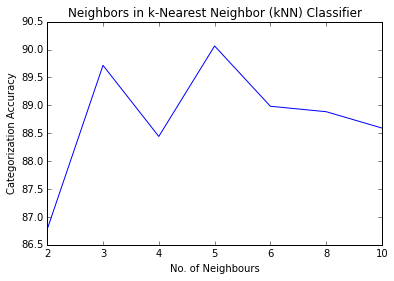

In [88]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectNeighbourScores, label = "Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.title("Neighbors in k-Nearest Neighbor (kNN) Classifier")

labels = [2,3,4,5,6,8,10]
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')
# plt.title("Optimal choice of Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.ylabel('Categorization Accuracy')
plt.xlabel('No. of Neighbours')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Hence, we choose k = 5 for our nearest neighbor classifier.

In [89]:
print len(testStateTransitionVector), len(trainStateTransitionVector)

706 2042


In [90]:
# Submission
train = np.hstack([trainBagVector, np.array(trainStateTransitionVector)])
test = np.hstack([testBagVector, np.array(testStateTransitionVector)])
params = {'neighbours':5}
neighbours = params['neighbours']
neigh = KNeighborsClassifier(n_neighbors=neighbours)
YPred = neigh.fit(train, YTrain).predict(test)
# writePredictedLabelFile(YPred)
UseChallenge3Predictions(YPred)

10 -1
10 -1
10 10
10 2
10 3
10 10
10 10
10 10
10 5
10 10
10 10
10 -1
10 10
10 1
10 4
10 10
10 5
10 7
10 10
10 10
10 10
10 10
10 5
10 10
10 -1
10 -1
10 10
10 4
10 10
10 -1


### Selection of Parameters for Random Forest

In [91]:
selectRandomForestScores = []

params = {'trees':200, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':200, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

print selectRandomForestScores

91.4280881622
91.5260110464
91.525293652
91.4777112239
91.477349246
91.4767499627
91.377871729
91.5747986025
91.5738373413
91.5252995638
91.4766377633
91.525293652
[91.42808816221368, 91.52601104644414, 91.5252936520207, 91.47771122387496, 91.47734924595753, 91.4767499627003, 91.3778717290318, 91.57479860251574, 91.57383734134108, 91.52529956375729, 91.47663776327067, 91.5252936520207]


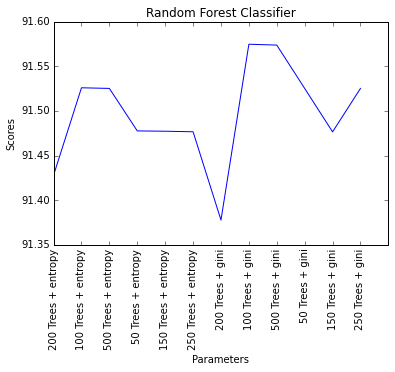

In [92]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectRandomForestScores, label = "Random Forest Classifier")
plt.title("Random Forest Classifier")

labels = ['200 Trees + entropy', '100 Trees + entropy', '500 Trees + entropy', '50 Trees + entropy', '150 Trees + entropy','250 Trees + entropy',
          '200 Trees + gini', '100 Trees + gini', '500 Trees + gini', '50 Trees + gini','150 Trees + gini','250 Trees + gini']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Parameters')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Hence, we choose 50 Trees with Entropy as a criterion for our Random Forest classifier.

In [ ]:
# Submission
params = {'trees':150, 'criterion':'entropy','random_state':None}
trees = params['trees']
crit = params['criterion']
seed = params['random_state']
clf = RandomForestClassifier(n_estimators=trees,criterion=crit,random_state=seed)
clf.fit(tfidfTrain, YTrain)
YPred = clf.predict(tfidfTest)
# writePredictedLabelFile(YPred)
UseChallenge3Predictions(YPred)

10 -1
10 -1
10 10
10 2
10 3
10 10
10 10
10 10
10 5
10 10
10 10
10 -1
10 10
10 1
10 4
10 10
10 5
10 7
10 10
10 10
10 10
10 10
10 5
10 10
10 -1
10 -1
10 10
10 4
10 10
10 -1


### Selection of Kernel for Multi Class SVM

In [ ]:
selectKernelScores = []

params = {'kernel':'poly'}
score = stratifiedKFoldVal(train, YTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(train, YTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

params = {'kernel':'rbf'}
score = stratifiedKFoldVal(train, YTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

In [ ]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectKernelScores, label = "Multiclass SVM Classifier")

labels = ['poly','linear','rbf']
plt.title("Multiclass SVM Classifier")
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')

plt.ylabel('Scores')
plt.xlabel('Kernel used')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
#### Hence, we choose Linear Kernel for our SVM classifier.

In [ ]:
params = {'kernel':'linear'}
ker = params['kernel']
YPred = svm.SVC(kernel=ker).fit(trainBagVector, YTrain).predict(testBagVector)
# writePredictedLabelFile(YPred)
UseChallenge3Predictions(YPred)

### Logistic Regression

In [ ]:
# params = {'multi':False}
train = tfidfTrain
score = stratifiedKFoldVal(train, YTrain, classifyLogisticRegression, params)
print score
train = trainBagVector
score = stratifiedKFoldVal(train, YTrain, classifyLogisticRegression, params)
print score

In [ ]:
params = {'multi':True}
train = trainStateTransitionVector
score = stratifiedKFoldVal(train, YTrain, classifyLogisticRegression, params)
print score

In [ ]:
LogReg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None)
LogReg.fit(trainBagVector, YTrain)
YPred = LogReg.predict(testBagVector)
# writePredictedLabelFile(YPred)
UseChallenge3Predictions(YPred)

### Define the parameters for Adaboost and use it on different training dataset

In [ ]:
train = trainBagVector
params = {'max_depth':1, 'algorithm':'SAMME', 'n_estimators':200}
score = stratifiedKFoldVal(train, YTrain, classifyAdaboostClassifier, params)
print score

In [ ]:
train = trainBagVector
params = {'max_depth':10, 'algorithm':'SAMME', 'n_estimators':500}
score = stratifiedKFoldVal(train, YTrain, classifyAdaboostClassifier, params)
print score

In [ ]:
train = tfidfTrain
params = {'max_depth':1, 'algorithm':'SAMME', 'n_estimators':200}
score = stratifiedKFoldVal(train, YTrain, classifyAdaboostClassifier, params)
print score

In [ ]:
train = tfidfTrain
params = {'max_depth':10, 'algorithm':'SAMME', 'n_estimators':500}
score = stratifiedKFoldVal(train, YTrain, classifyAdaboostClassifier, params)
print score

In [ ]:
# Submission
params = {'max_depth':10, 'algorithm':'SAMME', 'n_estimators':500}
train = tfidfTrain
test = tfidfTest
depth = params['max_depth']
algo = params['algorithm']
estimators = params['n_estimators']

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = depth),
                     algorithm = algo,
                     n_estimators=estimators)

bdt.fit(train, YTrain)
YPred = bdt.predict(test)
# writePredictedLabelFile(YPred)
UseChallenge3Predictions(YPred)

### Selection of Parameters for Neural Networks

In [ ]:
train = trainBagVector
# params = {'activation':'Rectifier', 'units':100, 'rate':0.02, 'iter':10}
params = {'activation':'Tanh', 'actLastLayer':'Softmax', 'rule':'momentum', 'units':100, 'rate':0.002, 'iter':10}
score = stratifiedKFoldVal(train, YTrain, classifyNeuralNetworkClassifier, params)
print score

In [ ]:
train = trainBagVector
# params = {'activation':'Rectifier', 'units':100, 'rate':0.02, 'iter':10}
params = {'activation':'Tanh', 'actLastLayer':'Softmax', 'rule':'sgd', 'units':100, 'rate':0.002, 'iter':10}
score = stratifiedKFoldVal(train, YTrain, classifyNeuralNetworkClassifier, params)
print score

In [ ]:
train = trainBagVector
params = {'activation':'Sigmoid', 'actLastLayer':'Softmax', 'rule':'rmsprop', 'units':100, 'rate':0.002, 'iter':10}
score = stratifiedKFoldVal(train, YTrain, classifyNeuralNetworkClassifier, params)
print score

In [ ]:
# Submission
tr = trainBagVector
te = testBagVector
params = {'activation':'Tanh', 'actLastLayer':'Softmax', 'rule':'adagrad', 'units':100, 'rate':0.002, 'iter':10}
activation = params['activation']
actLastLayer = params['actLastLayer']
rule = params['rule']
noOfUnits = params['units']
rate = params['rate']
noOfIter = params['iter']
nn = Classifier(layers=[Layer(activation, units=noOfUnits),Layer(actLastLayer)], learning_rule=rule,
        learning_rate=0.02,
        n_iter=10)
nn.fit(tr, YTrain)
YPred = nn.predict(te)
# writePredictedLabelFile(YPred)
UseChallenge3Predictions(YPred)

### Get features in format for Models of NLTK Classify 

In [ ]:
def featNLTKClassify(samples, phase):
    featureVectors = vectorizer.get_feature_names()
    nltkClassifySamples = []

    for i in xrange(len(samples)):
        t = samples[i]
        lstFuncCalls = t.split()
        wordOccDict = {}
        for j in xrange(len(featureVectors)):
             wordOccDict[featureVectors[j]] = lstFuncCalls.count(featureVectors[j])
        if phase == 'train':
            nltkClassifySamples.append((wordOccDict, YTrain[i]))
        else:
            nltkClassifySamples.append(wordOccDict)

    return nltkClassifySamples

In [ ]:
nltkClassifyTrain = featNLTKClassify(trainSamples, 'train')
nltkClassifyTest = featNLTKClassify(testSamples, 'test')

### Nave Baiyes Classifier

In [ ]:
tr = nltkClassifyTrain
te = nltkClassifyTest
classifier = nltk.classify.NaiveBayesClassifier.train(tr)
sorted(classifier.labels())

In [ ]:
classifier.classify_many(te)

classifier.show_most_informative_features()
# print nltk.classify.accuracy(classifier, te)*100

### Maximum Entropy Classifier

In [ ]:
from nltk.classify import maxent
tr = nltkClassifyTrain
te = nltkClassifyTest
classifierME = maxent.MaxentClassifier.train(tr, bernoulli=False, encoding=encoding, trace=0)
classifierME.classify_many(te)

### Decision Tree Classifier

In [ ]:
tr = nltkClassifyTrain
te = nltkClassifyTest

classifier = nltk.classify.DecisionTreeClassifier.train(tr, entropy_cutoff=0,support_cutoff=0)
sorted(classifier.labels())
print(classifier)
classifier.classify_many(te)

### Graphs depicting Categorization Accuracy scores on KFold Stratified Validation on Train data for:

In [36]:
selectRandomForestScores = []
selectKernelScores = []
selectNeighbourScores = []

train = trainBagVector

params = {'trees':50, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(train, YTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)



train = tfidfTrain

params = {'trees':50, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(train, YTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)


train = np.array(trainStateTransitionVector)

params = {'trees':50, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

# Doesn't converge !!
# params = {'kernel':'linear'}
# score = stratifiedKFoldVal(train, YTrain, classifyMultiClassSVMClassifier, params)
# print score
# selectKernelScores.append(score)
selectKernelScores.append(0)


train = np.hstack([trainBagVector, np.array(trainStateTransitionVector)])

params = {'trees':50, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(train, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(train, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

# Doesn't converge !!
# params = {'kernel':'linear'}
# score = stratifiedKFoldVal(train, YTrain, classifyMultiClassSVMClassifier, params)
# print score
# selectKernelScores.append(score)
selectKernelScores.append(0)



print selectRandomForestScores
print selectKernelScores
print selectNeighbourScores

91.4779421841
90.0631390457
88.9788781921
91.0378349435
88.162460332
88.1531008751
91.3791884067
88.2964369827
91.4777112239
88.7841242692
[91.47794218414563, 91.03783494351839, 91.37918840671246, 91.47771122387496]
[88.9788781921238, 88.1531008751496, 0, 0]
[90.06313904566821, 88.16246033200362, 88.29643698273578, 88.78412426915179]


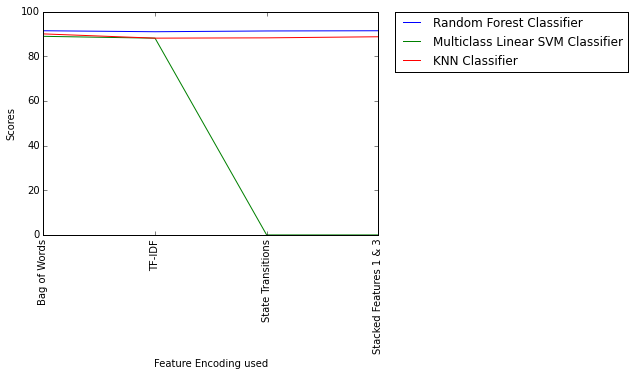

In [37]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectRandomForestScores, label = "Random Forest Classifier")
plt.plot(selectKernelScores, label = "Multiclass Linear SVM Classifier")
plt.plot(selectNeighbourScores, label = "KNN Classifier")

labels = ['Bag of Words', 'TF-IDF', 'State Transitions', 'Stacked Features 1 & 3']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Feature Encoding used')
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Final evaluation results on Kaggle

### Bar graph depicting Public vs Private Categorization Accuracy Scores on the different Models.

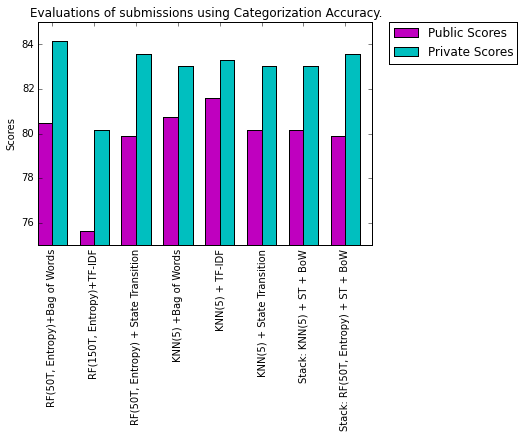

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 8
publicScore = (80.453, 75.637, 79.887, 80.737, 81.586, 80.170, 80.170, 79.887)
privateScore = (84.136, 80.170, 83.569, 83.003, 83.286, 83.003, 83.003, 83.569)
modelNames = ('RF(50T, Entropy)+Bag of Words', 'RF(150T, Entropy)+TF-IDF', 'RF(50T, Entropy) + State Transition', 
              'KNN(5) +Bag of Words', 'KNN(5) + TF-IDF', 'KNN(5) + State Transition',
              'Stack: KNN(5) + ST + BoW', 'Stack: RF(50T, Entropy) + ST + BoW')

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, publicScore, width, color='m')

rects2 = ax.bar(ind + width, privateScore, width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Evaluations of submissions using Categorization Accuracy.')
ax.set_xticks(ind + width)
ax.set_xticklabels(modelNames,  rotation='vertical')
ax.set_ylim(75,85)

# def autolabel(rects):
#     # attach some text labels
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

# Place a legend to the right of this smaller figure.
ax.legend((rects1[0], rects2[0]), ('Public Scores', 'Private Scores'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Hence we conclude that the best model is kNN using TF-IDF as features !